In [26]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_spotify = pd.read_csv("top50.csv", encoding="latin-1")
data_spotify

Unnamed: 0                                         Track.Name  \
0            1                                           Señorita   
1            2                                              China   
2            3                      boyfriend (with Social House)   
3            4                    Beautiful People (feat. Khalid)   
4            5                        Goodbyes (Feat. Young Thug)   
5            6                  I Don't Care (with Justin Bieber)   
6            7                                             Ransom   
7            8                                  How Do You Sleep?   
8            9                              Old Town Road - Remix   
9           10                                            bad guy   
10          11                                           Callaita   
11          12              Loco Contigo (feat. J. Balvin & Tyga)   
12          13                                  Someone You Loved   
13          14                                 Otro Trago - Remix   
14          15           Money In The Grave (Drake ft. Rick Ross)   
15          16                          No Guidance (feat. Drake)   
16          17                                         LA CANCIÓN   
17          18      Sunflower - Spider-Man: Into the Spider-Verse   
18          19                                             Lalala   
19          20                                        Truth Hurts   
20          21                                Piece Of Your Heart   
21          22                                             Panini   
22          23                               No Me Conoce - Remix   
23          24                                    Soltera - Remix   
24          25                       bad guy (with Justin Bieber)   
25          26                                If I Can't Have You   
26          27                                       Dance Monkey   
27          28                                           It's You   
28          29                                          Con Calma   
29          30                                      QUE PRETENDES   
30          31                                           Takeaway   
31          32                                            7 rings   
32          33                                  0.958333333333333   
33          34          The London (feat. J. Cole & Travis Scott)   
34          35                                  Never Really Over   
35          36  Summer Days (feat. Macklemore & Patrick Stump ...   
36          37                                         Otro Trago   
37          38                     Antisocial (with Travis Scott)   
38          39                                             Sucker   
39          40  fuck, i'm lonely (with Anne-Marie) - from 13 ...   
40          41                                        Higher Love   
41          42                              You Need To Calm Down   
42          43                                            Shallow   
43          44                                               Talk   
44          45                                         Con Altura   
45          46                                    One Thing Right   
46          47                                          Te Robaré   
47          48                                            Happier   
48          49                                      Call You Mine   
49          50      Cross Me (feat. Chance the Rapper & PnB Rock)   

         Artist.Name             Genre  Beats.Per.Minute  Energy  \
0       Shawn Mendes      canadian pop               117      55   
1           Anuel AA    reggaeton flow               105      81   
2      Ariana Grande         dance pop               190      80   
3         Ed Sheeran               pop                93      65   
4        Post Malone           dfw rap               150      65   
5         Ed Sheeran               pop               102      68   
6       

In [4]:
data_spotify.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [8]:
list_cat = ["Artist.Name"]

list_num=['Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.']

In [17]:
Spotify_num = pd.DataFrame(data_spotify[list_num])

In [31]:
y = data_spotify["Artist.Name"]

In [18]:
X = Spotify_num

In [19]:
k = 4
clustering = KMeans(n_clusters=k, random_state=42)
y_pred = clustering.fit_predict(X)

In [20]:
clustering.cluster_centers_

array([[160.66666667,  58.58333333,  69.        ,  -6.58333333,
         11.41666667,  46.08333333, 196.08333333,  25.41666667,
         25.83333333,  90.08333333],
       [ 97.71428571,  63.28571429,  68.19047619,  -5.47619048,
         17.85714286,  47.14285714, 208.95238095,  22.42857143,
          8.04761905,  86.71428571],
       [119.84615385,  65.69230769,  76.61538462,  -5.76923077,
         11.84615385,  70.15384615, 164.76923077,  20.53846154,
          8.07692308,  86.15384615],
       [116.25      ,  79.25      ,  78.25      ,  -3.5       ,
         16.75      ,  68.75      , 291.25      ,  16.25      ,
         10.        ,  88.25      ]])

In [21]:
Spotify_num['predict']=y_pred

In [22]:
clustering.inertia_

100766.65842490841

In [24]:
from sklearn.metrics import silhouette_score

cluster = [i for i in range(1,10)]
inertie = []
silouhete = []



for i in cluster:
    k = i
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    if k > 1:
        silouhete.append(silhouette_score(Spotify_num, clustering.labels_))
    
    inertie.append(clustering.inertia_)

inertie

[194282.8600000001,
 147893.58928571432,
 115426.0988756614,
 100766.65842490841,
 86397.12175324673,
 76486.08846153847,
 69947.99835164832,
 65126.27222222223,
 60299.20952380953]

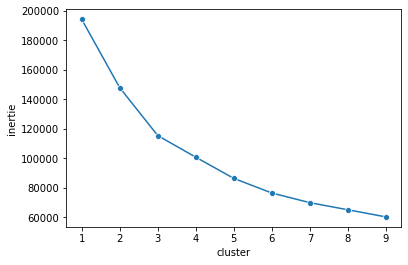

In [27]:
data = pd.DataFrame({'cluster':cluster, 'inertie':inertie})
sns.lineplot(data=data, x="cluster", y="inertie", marker='o');

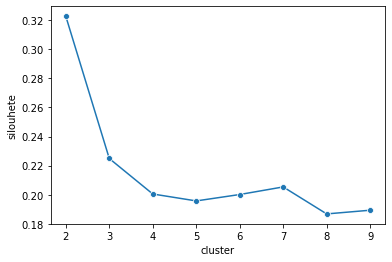

In [28]:
data = pd.DataFrame({'cluster':cluster[1:], 'silouhete':silouhete})
sns.lineplot(data=data, x="cluster", y="silouhete", marker='o');

In [36]:
Spotify_num

Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  \
0                117      55            76              -6         8   
1                105      81            79              -4         8   
2                190      80            40              -4        16   
3                 93      65            64              -8         8   
4                150      65            58              -4        11   
5                102      68            80              -5         9   
6                180      64            75              -6         7   
7                111      68            48              -5         8   
8                136      62            88              -6        11   
9                135      43            70             -11        10   
10               176      62            61              -5        24   
11                96      71            82              -4        15   
12               110      41            50              -6        11   
13               176      79            73              -2         6   
14               101      50            83              -4        12   
15                93      45            70              -7        16   
16               176      65            75              -6        11   
17                90      48            76              -6         7   
18               130      39            84              -8        14   
19               158      62            72              -3        12   
20               124      74            68              -7         7   
21               154      59            70              -6        12   
22                92      79            81              -4         9   
23                92      78            80              -4        44   
24               135      45            67             -11        12   
25               124      82            69              -4        13   
26                98      59            82              -6        18   
27                96      46            73              -7        19   
28                94      86            74              -3         6   
29                93      79            64              -4        36   
30                85      51            29              -8        10   
31               140      32            78             -11         9   
32                96      71            78              -5         9   
33                98      59            80              -7        13   
34               100      88            77              -5        32   
35               114      72            66              -7        14   
36               176      70            75              -5        11   
37               152      82            72              -5        36   
38               138      73            84              -5        11   
39                95      56            81              -6         6   
40               104      68            69              -7        10   
41                85      68            77              -6         7   
42                96      39            57              -6        23   
43               136      40            90              -9         6   
44                98      69            88              -4         5   
45                88      62            66              -2        58   
46               176      75            67              -4         8   
47               100      79            69              -3        17   
48               104      70            59              -6        41   
49                95      79            75              -6         7   

    Valence.  Length.  Acousticness..  Speechiness.  Popularity  predict  
0         75      191               4             3          79        2  
1         61      302               8             9          92        3  
2         70      186              12            46          85        0  
3         55      198          

<AxesSubplot:xlabel='Popularity', ylabel='Energy'>

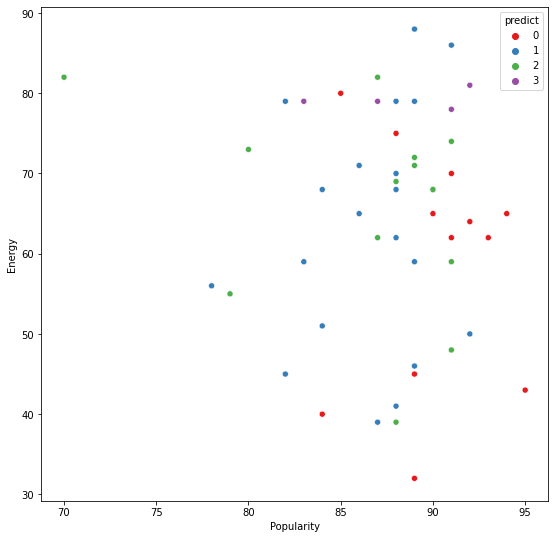

In [38]:
k = 3
clustering = KMeans(n_clusters=k, random_state=42)
y_pred = clustering.fit_predict(X)

plt.figure(figsize=[20,20])
plt.subplot(221)
sns.scatterplot(data=Spotify_num, y='Energy', x='Popularity',
                hue='predict', palette="Set1")

In [33]:
plt.scatter(y_pred[:,0], y_pred[:,1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed